# 03 Example - Repeat Scans

In [1]:
import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np
import random

## Setup devices

In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1
devices.v2 = ps.TestVoltage() # Device 2
devices.v3 = ps.TestVoltage() # Device 3

## Define a measure function

In [3]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2 devices and adds a random component. Also adds a calculated value vsum.
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1_readout = devices.v1.voltage + random.gauss(mu=0, sigma=1)
    d.v2_readout = devices.v2.voltage + random.gauss(mu=0, sigma=1)

    d.vsum = d.v1_readout + d.v2_readout
    
    return d

## Experiments

### 1. 1D Scan with scan0 as RepeatScan, using point data

In [4]:
# Set up the runinfo with scan0 as RepeatScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.RepeatScan(20, dt=0.001)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()

<function get_voltage_data at 0x11c4800e0>


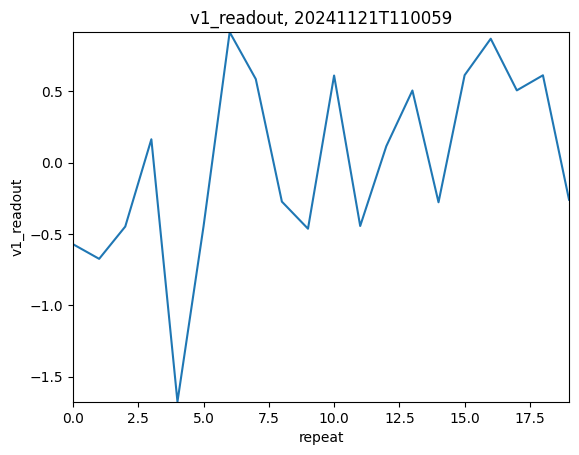

In [5]:
# 1D Plot using point data
ps.live_plot1D(expt, data_name="v1_readout")

### 2. 2D Scan with scan1 as RepeatScan, using point data

In [6]:
# Set up the runinfo with scan0 as PropertyScan and scan1 as RepeatScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 1, 10)}, prop='voltage', dt=0.001)
runinfo.scan1 = ps.RepeatScan(10, dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()


<function get_voltage_data at 0x11c4800e0>


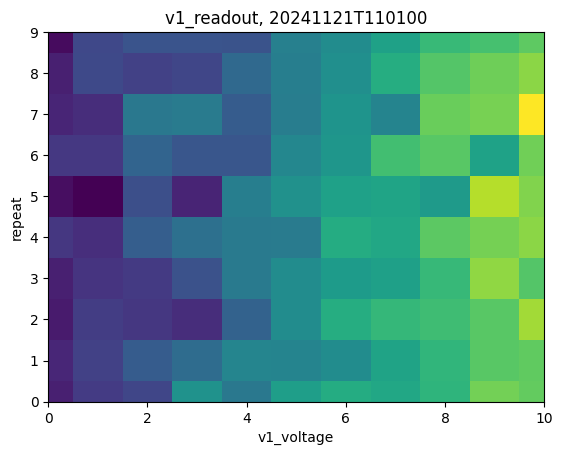

In [7]:
# 2D Plot using point data
ps.live_plot2D(expt, data_name="v1_readout")

### 3. 2D Scan with scan0 as RepeatScan, using point Data

In [8]:
# Set up the runinfo with scan0 as RepeatScan and scan1 as PropertyScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.RepeatScan(10, dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v1': ps.drange(0, 1, 10)}, prop='voltage', dt=0.001)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()

<function get_voltage_data at 0x11c4800e0>


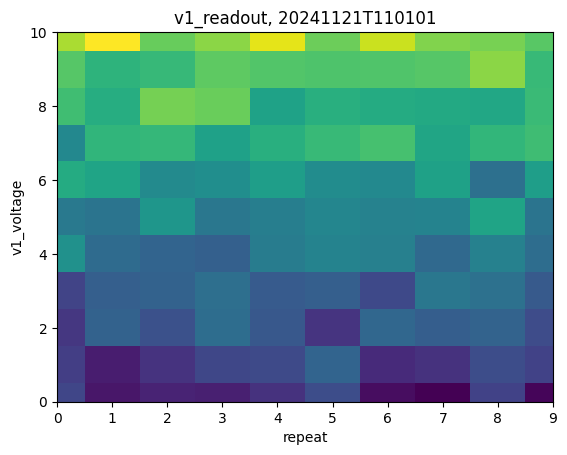

In [9]:
# 2D Plot using point data
try:
    ps.live_plot2D(expt, data_name="v1_readout")
except KeyboardInterrupt:
    expt.stop()